In [23]:
import pandas as pd
import numpy as np
scores=pd.read_csv('aln1/xx.tsv',delim_whitespace=True,header=None)
matrix= scores.pivot(index=1, columns=0, values=3)
fill=matrix.fillna(0.05)
sym_mat=np.triu(fill)/2 + np.triu(fill, 1).T/2+np.tril(fill).T/2+np.tril(fill,-1)/2
# with open('query.source','r') as f:
#     qs=[i.split()[1].replace('.pdb','') for i in  f.readlines()]
# with open('db.source','r') as f:
#     ds=[i.split()[1].replace('.pdb','') for i in  f.readlines()]
# matrix=pd.DataFrame(columns=qs,index=qs)
# for _,s in scores.iterrows():
#     matrix[s[1].replace('.pdb','')][s[0].replace('.pdb','')]=s[2]


foldseek createdb pdbs query/db
foldseek createdb pdbs db/db
foldseek search query/db db/db aln/aln tmp/ -a
foldseek aln2tmscore query/db  db/db  aln/aln aln_tmscore/aln_tmscore
foldseek createtsv query/db  db/db aln_tmscore/aln_tmscore aln_tmscore.tsv

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits
0,RAVV||DQ447649,RAVV||DQ447649,1.000,1082,0,0,1,1082,1,1082,0.000000e+00,2260
1,RAVV||DQ447649,MARV||DQ217792,0.949,1082,55,0,1,1082,1,1082,0.000000e+00,2176
2,RAVV||DQ447649,MLAV||KX371887,0.700,1083,323,2,1,1082,1,1082,0.000000e+00,1602
3,RAVV||DQ447649,EBOV||AF086833,0.562,1091,456,5,1,1082,1,1078,0.000000e+00,1229
4,RAVV||DQ447649,RESTV||AF522874,0.560,1082,472,2,1,1082,1,1078,0.000000e+00,1221
...,...,...,...,...,...,...,...,...,...,...,...,...
251,XILV||MG599980,RAVV||DQ447649,0.429,1090,588,13,1,1067,3,1081,2.776000e-272,855
252,XILV||MG599980,FIWIV||MN510772,0.297,833,569,9,221,1043,207,1032,5.449000e-120,406
253,XILV||MG599980,KNDV||MW093492,0.303,851,558,12,211,1043,199,1032,1.210000e-117,399
254,XILV||MG599980,HUJV||MG599981,0.298,835,565,10,221,1043,209,1034,1.605000e-114,389


In [15]:
with open('../../../palmfold/pol/rdrp.model.list','r') as f:
    rdrp=[i.strip()[:4] for i in  f.readlines()]

In [19]:
cdict={'rdrp':'red','rt':'purple','dddp':'blue','ddrp':'orange'}
annotaions=pd.read_csv('../../../palmfold/pol/pol.metadata',
                       sep='\t',
                       index_col='pdb')
annotaions.index=[i[:4] for i in annotaions.index]
dendro_color=[cdict[annotaions.loc[i]['type']] for i in fill.index]

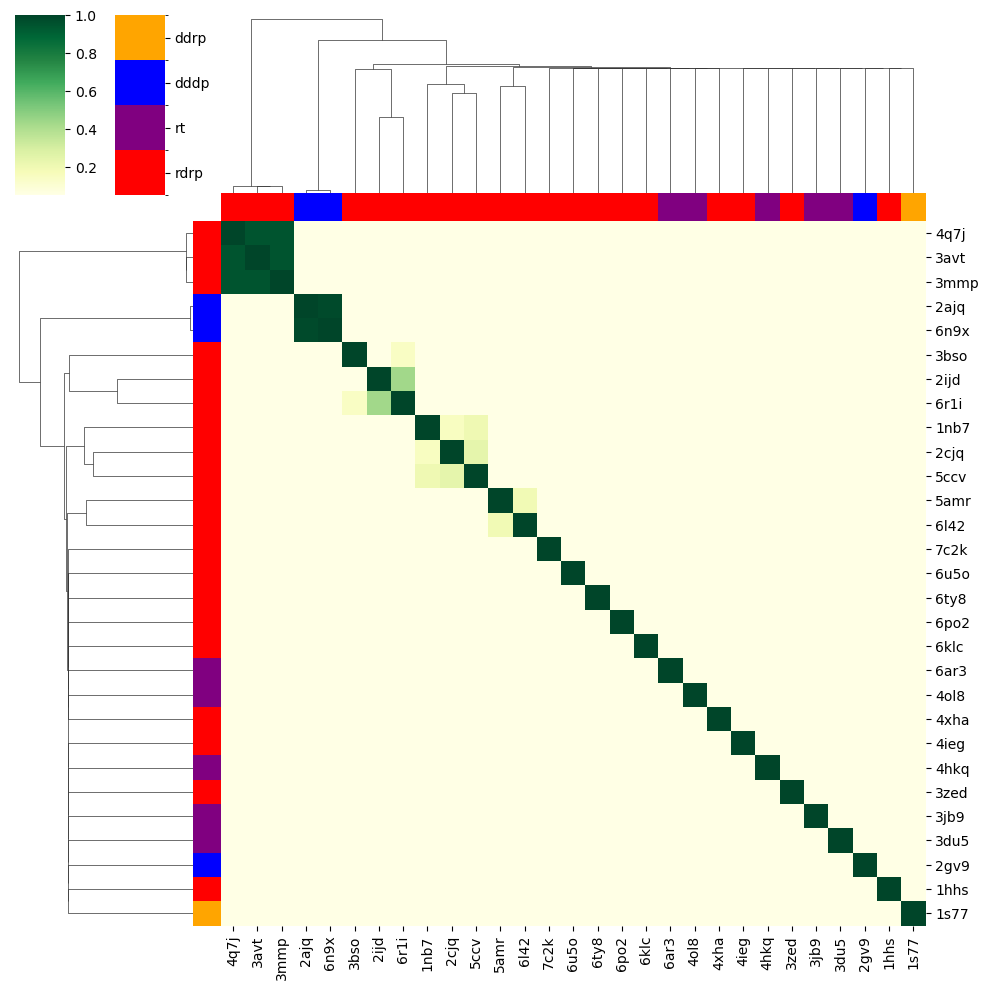

In [24]:

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
plt.close('all')


cmap1=sns.clustermap(sym_mat,
               cmap='YlGn',
               xticklabels=matrix.index,
               yticklabels=matrix.index,
               row_colors=dendro_color,
               col_colors=dendro_color,
               rasterized=True)

# cax = cmap1.figure.add_axes((0.15,0.81,0.05,0.17,))
p1,p2,p3,p4=cmap1.cbar_pos

cax = cmap1.figure.add_axes((p1+p3+0.05,p2,p3,p4))
from matplotlib.colors import ListedColormap
lcm = ListedColormap(cdict.values())

cates=len(cdict.values())
norm = matplotlib.colors.BoundaryNorm(np.arange(cates+1), cates, clip=True)
map_list={i:j[:4] for i,j in enumerate(cdict.keys())}
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos:map_list[norm(x)])



tax_bar=cmap1.figure.colorbar(matplotlib.cm.ScalarMappable(norm=norm,cmap=lcm), 
                              cax=cax,orientation='vertical', format=fmt, ticks=np.arange(cates)+0.5)

tax_bar.dividers.set_linewidth(0.0)
tax_bar.outline.set_linewidth(0.0)
cmap1.figure.savefig('_pol_heat.svg')
# plt.close('all')

In [19]:
cates

4

In [17]:
norm(7)

3

In [12]:
np.arange(cates)+0.5

array([0.5, 1.5, 2.5, 3.5])

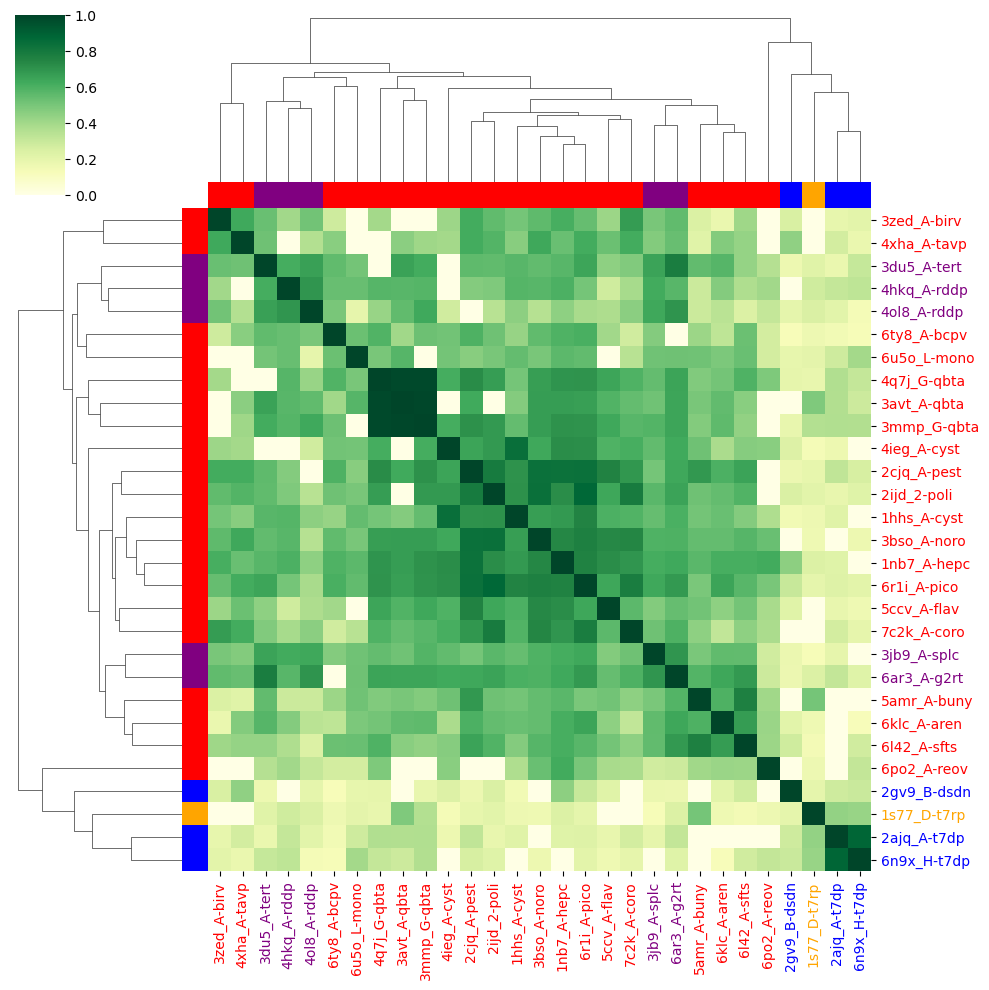

In [79]:
import numpy as np

clustermap=sns.clustermap(np.triu(fill) + np.triu(fill, 1).T,
               cmap='YlGn',
               xticklabels=fill.index,yticklabels=fill.index,
               row_colors=dendro_color,col_colors=dendro_color)

for ylabel,xlabel in zip(clustermap.ax_heatmap.axes.get_yticklabels(),
                      clustermap.ax_heatmap.axes.get_xticklabels()):
        # max_age=ages.loc[tick_label.get_text(),'max_age']
        color=cdict[annotaions.loc[ylabel.get_text()]['type']]
        xlabel.set_color(color)
        ylabel.set_color(color)

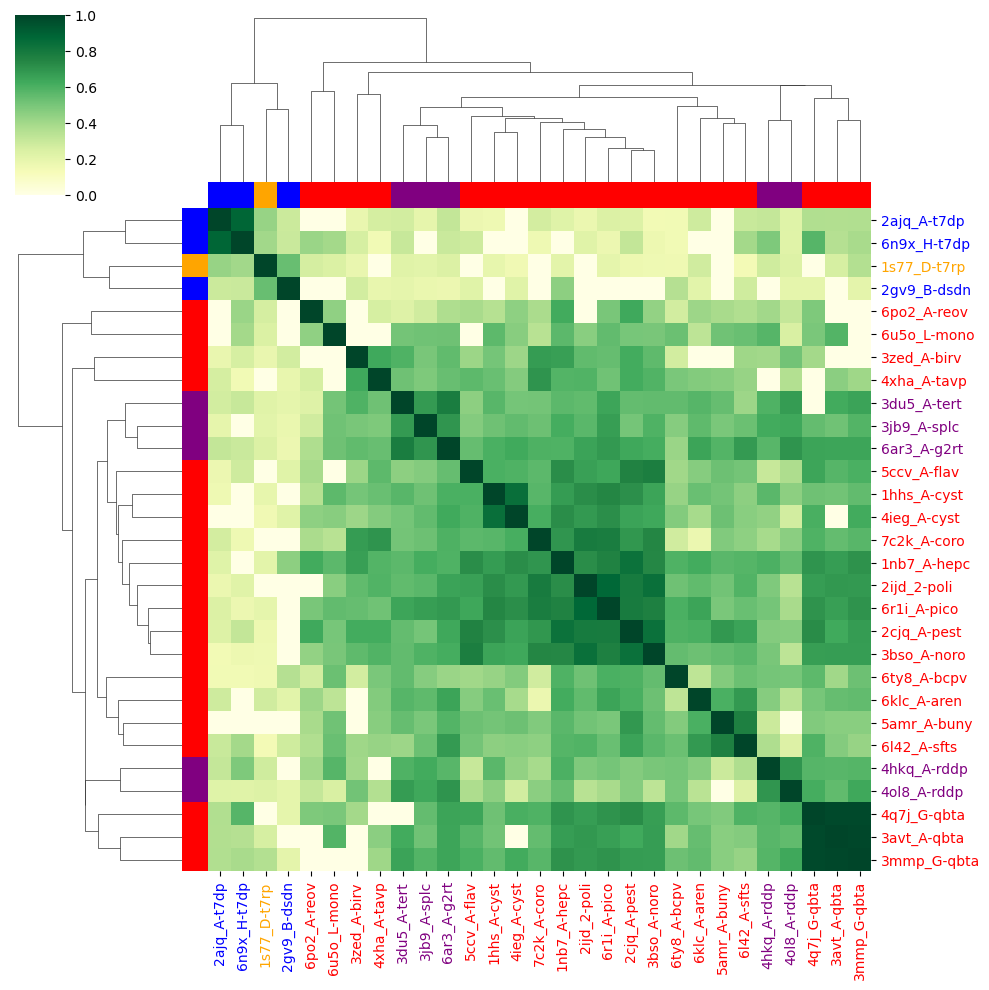

In [82]:
import numpy as np

clustermap=sns.clustermap(np.tril(fill).T+np.tril(fill,-1),
               cmap='YlGn',
               xticklabels=fill.index,yticklabels=fill.index,
               row_colors=dendro_color,col_colors=dendro_color)


for ylabel,xlabel in zip(clustermap.ax_heatmap.axes.get_yticklabels(),
                      clustermap.ax_heatmap.axes.get_xticklabels()):
        # max_age=ages.loc[tick_label.get_text(),'max_age']
        color=cdict[annotaions.loc[ylabel.get_text()]['type']]
        xlabel.set_color(color)
        ylabel.set_color(color)

In [ ]:
"--format-output target,evalue,bits,taxname,taxlineage,taxid,qaln,taln"